# P411 - Assignment 5
Kristi Webb, Oct 16 2015

github k-a-webb

In [1]:
import numpy.random as random
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

## Q1: Distribution of power spectral estimates

<div style='background:#F0F0F0'>**1** You **may** use `matplotlib.mlab.psd` for the following question, but you had best use it correctly!

Using normally distributed random noise time series of length $N=2048$, show using a Monte Carlo analysis and by comparison to the theoretical probability distribution functions that:  
</div>

   1. The raw spectral estimate is indeed distributed as $\chi^2_2$.
   2. Show that block averaging with no overlap is distributed as $\chi^2_{2N_{blocks}}$.
   3. Show that block averaging with 50% overlap Hanning windows is distributed as $\chi^2_{2N_{blocks}}$.

<div style='background:#F0F0F0'>You can choose your block length, but making it an integer divisor of 2048 will make your life a lot easier.  Show that as $N_{blocks}$ is increased the variance drops (i.e. the distribution of the spectral estimates gets tighter).</div>


<div style='background:#F0F0F0'>HINT: for this time series the individual frequency estimates are indipendent samples of the distribution, so you can use them in compiling your distributions.</div>

<div style='background:#F0F0F0'>HINT: To get the pdf of the $\chi^2_\nu$ distribution correct, you need to "scale" by $\nu^{-1}$ where $\nu$ are the degrees of freedom.</div>

<div style='background:#F0F0F0'>HINT: for good presentation, make your histograms have the same bin sizes, and compare the distributions for all three cases on the same plot.</div>

<hr>

# Raw spectral estimate

In [193]:
N = 2048

def normal_dist(N):
    x = np.random.rand(N)
    x -= np.mean(x)  # to normalize
    return x   

def pow_spec(x, fs=1, plot=False):
    X = np.fft.fft(x)/fs
    N=len(x)
    T = N/fs
    Gxx = (2./T)*np.real(np.conj(X[:N/2])*X[:N/2])
    f = np.arange(N/2.)/T
    if plot:
        plt.loglog(f,Gxx)   
    return Gxx, f         

In [194]:
# Check that mlab.psd returns the extected power spectrum
x = normal_dist(N)
Gxx, f = pow_spec(x)
Pxx, ff = mlab.psd(x, NFFT=len(x), Fs=1) # these parameters seem to work

#plt.plot(f, Gxx, '-g') ; plt.plot(ff, Pxx, '-b')

In [195]:
NN = 1000
df = 2.

Gxs = np.zeros((NN,N/2)) 

for ind in range(NN):
    x = normal_dist(N)
    Gxx, f = pow_spec(x)
    #Gxx, f = mlab.psd(x, NFFT=len(x), Fs=1)
    Gxs[ind,:] = Gxx  

Gm = np.mean(Gxs, axis=0)

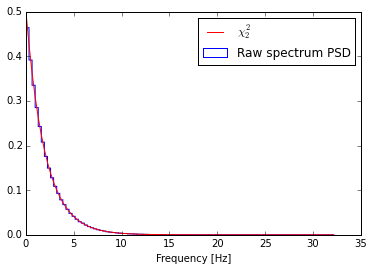

In [196]:
Gxsf = Gxs.flat   # Take all iterations of the power spectrum calculated in the Monte Carlo simulation
Gxsfn = (Gxsf)/np.std(Gxsf) * df  # Normalize

nn, bins, patches = plt.hist(Gxsfn, 100, normed=True, histtype='step', label='Raw spectrum PSD')
chi2 = stats.chi2.pdf(bins, df=df)
plt.plot(bins, chi2, '-r', label=r'$\chi^2_2$')
plt.xlabel('Frequency [Hz]') ; plt.legend() ; plt.show()

# Block averging

In [220]:
NN = 1000
nblock = 8
if N % num_blks != 0:
    print N % num_blks # Catch the case where there are extra/missing points
    
df = 2. * nblock
Nblock = N / nblock

n = Nblock/2+1
Gblocks = np.empty(NN*n)

for i in range(NN):
    #x = normal_dist(N)
    x = np.random.randn(N)
    a = i*n ; b = a+n  # bounds of the data set
    Gblock, fblock = mlab.psd(x, Fs=1, NFFT=Nblock, window=mlab.window_none)  #divide into 8 blocks
    Gblocks[a:b] = Gblock/np.mean(Gblock)

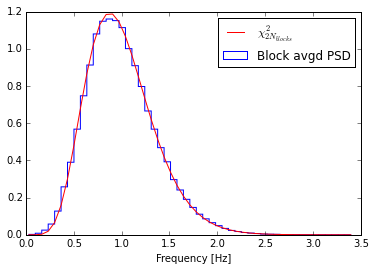

In [221]:
nn, bins, patches = plt.hist(Gblocks, bins=50, normed=True, histtype='step', label='Block avgd PSD')
chi2 = stats.chi2.pdf(bins*df, df)*df

plt.plot(bins, chi2, '-r', label=r'$\chi^2_{2N_{blocks}}$')
plt.xlabel('Frequency [Hz]') ; plt.legend() ; plt.show()

# block averaging with 50% overlap Hanning windows

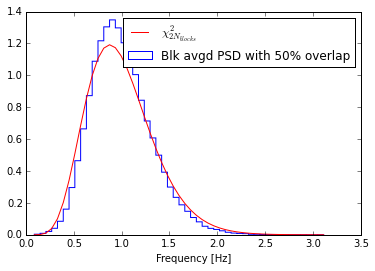

In [226]:
NN = 1000
nblock = 8
if N % num_blks != 0:
    print N % num_blks # Catch the case where there are extra/missing points
    
df = 2. * nblock
Nblock = N / nblock

n = Nblock/2+1
Gblocks = np.empty(NN*n)

for i in range(NN):
    #x = normal_dist(N)
    x = np.random.randn(N)
    a = i*n ; b = a+n  # bounds of the data set
    Gblock, fblock = mlab.psd(x, Fs=1, NFFT=Nblock, noverlap=Nblock/2, window=mlab.window_none)  #divide into 8 blocks
    Gblocks[a:b] = Gblock/np.mean(Gblock)
    
nn, bins, patches = plt.hist(Gblocks, bins=50, normed=True, histtype='step', label='Blk avgd PSD with 50% overlap')
chi2 = stats.chi2.pdf(bins*df, df)*df

plt.plot(bins, chi2, '-r', label=r'$\chi^2_{2N_{blocks}}$')
plt.xlabel('Frequency [Hz]') ; plt.legend() ; plt.show()    

<hr>
<div style='background:#F0F0F0'>**2**  For the Hanning window estimate, what fits better: $2N_{blocks}$ degrees of freedom or $18N_{blocks}/11$ degrees of freedom (the correct theoretical value)?  Its OK to evaluate by eye.</div>
<hr>

## Q2: Spectra of a "red-noise" signal

<div style='background:#F0F0F0'> **1** Load in the Deep Cove hourly data, and compute the power spectra using some reasonable value for $N_{FFT}$, and comment on the effect of applying the Hanning window to not applying it to the spectral leakage.</div>
<hr>

In [ ]:
hourdata=np.genfromtxt('http://web.uvic.ca/~jklymak/Phy411/Data/AllHourly.txt')[[6,28],2:]
dc = hourdata[0,:]
dc=dc[np.isfinite(dc)]

<hr>
<div style='background:#F0F0F0'> **2** Now do the same thing to the intergal of the Deep Cove data with time: $$y(t)=\int_o^t x(t')\ \mathrm{d}t'$$  This is obviously a silly thing to do, but compare the spectra and comment on the difference between the Hanning window and the non-Hanning windowed data.  </div>
<hr>